In [42]:
import numpy as np
import matplotlib.pyplot as plt
from polyreg import PolynomialRegression
import matplotlib as mpl

In [8]:
plt.style.use('../../jfc.mplstyle')

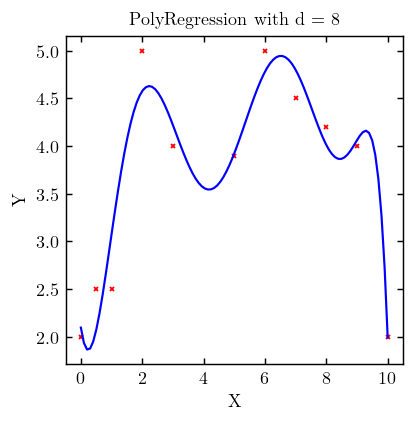

In [78]:
# load the data
filePath = "data/polydata.dat"
file = open(filePath,'r')
allData = np.loadtxt(file, delimiter=',')

X = allData[:, [0]]
y = allData[:, [1]]

# regression with degree = d
d = 8
model = PolynomialRegression(degree=d, reg_lambda=0)
model.fit(X, y)

# output predictions
xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
ypoints = model.predict(xpoints)

# plot curve
fig = plt.figure()
plt.plot(X, y, 'rx')
plt.title('PolyRegression with d = '+str(d))
plt.plot(xpoints, ypoints, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
fig.savefig('../A4.1.pdf')

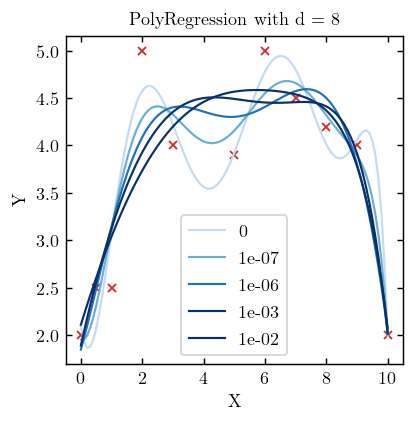

In [79]:
# load the data
filePath = "data/polydata.dat"
file = open(filePath,'r')
allData = np.loadtxt(file, delimiter=',')

X = allData[:, [0]]
y = allData[:, [1]]

# plot curve
fig = plt.figure()
plt.plot(X, y, 'C3x', markersize=4)

# regression with degree = d
d = 8

# different lambdas to plots
lambdas = [0, 1e-7, 1e-6, 1e-3, 1e-2]
labels = ['0', '1e-07', '1e-06', '1e-03', '1e-02']

# colors for different lambdas
c = np.arange(len(lambdas))
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

for i in range(len(lambdas)):
    model = PolynomialRegression(degree=d, reg_lambda=lambdas[i])
    model.fit(X, y)
    xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
    ypoints = model.predict(xpoints)
    plt.plot(xpoints, ypoints, label=labels[i], c=cmap.to_rgba(i + 1))
    

plt.legend()
plt.title('PolyRegression with d = '+str(d))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

fig.savefig('../A4.2.pdf')

In [5]:
import numpy as np
from mnist import MNIST

def load_dataset():
    mndata = MNIST('../../../python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, labels_train, X_test, labels_test

X_train, Y_train, X_test, Y_test = load_dataset()

class MNIST_Classifier():
    
    def __init__(self):
        self.W = None
    
    def train(self, X, Y, regLambda=0):
        
        n,d = X.shape
        
        # X matrix with ones column
        X_ = np.c_[np.ones(n), X]
        
        # regularization matrix
        regMatrix = regLambda * np.identity(d + 1)
        regMatrix[0, 0] = 0
        
        # Y matrix with one-hot encoding
        k = 10
        Y_ = np.identity(k)[Y]

        # analytical solution (X'X + regMatrix)^-1 X' Y
        self.W = np.linalg.solve(X_.T.dot(X_) + regMatrix, X_.T.dot(Y_))
        
    def predict(self, X):
        
        n,d = X.shape
        
        # X matrix with ones column
        X_ = np.c_[np.ones(n), X]
        
        # predict vectors
        Y = self.W.T.dot(X_.T).T
        
        # return argmax for each vector
        return Y.argmax(axis=1)
    
classifier = MNIST_Classifier()
classifier.train(X_train, Y_train, 1e-4)

diff_train = Y_train - classifier.predict(X_train)
e_train = len(diff_train[diff_train != 0]) / len(diff_train)
print(f'Train error = {e_train:.4f}')

diff_test = Y_test - classifier.predict(X_test)
e_test = len(diff_test[diff_test != 0]) / len(diff_test)
print(f'Test error = {e_test:.4f}')

Train error = 0.1423
Test error = 0.1397


In [4]:
X_train, Y_train, X_test, Y_test = load_dataset()

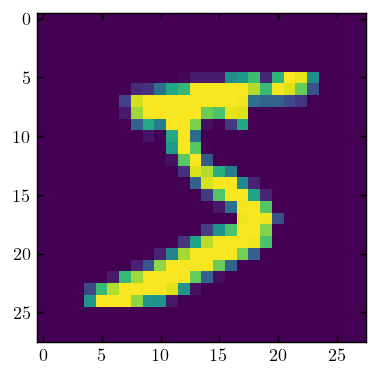

In [106]:
plt.imshow(X_train[0].reshape(28,28))

In [98]:
labels_train[2]

4

In [1]:
import numpy as np
from mnist import MNIST

def load_dataset():
    mndata = MNIST('../../../python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, labels_train, X_test, labels_test

X_train, Y_train, X_test, Y_test = load_dataset()

class MNIST_Classifier():
    
    def __init__(self):
        self.W = None
    
    def train(self, X, Y, regLambda=0):
        
        n,d = X.shape
        
        # X matrix with ones column
        X_ = np.c_[np.ones(n), X]
        
        # regularization matrix
        regMatrix = regLambda * np.identity(d + 1)
        regMatrix[0, 0] = 0
        
        # Y matrix with one-hot encoding
        k = 10
        Y_ = np.identity(k)[Y]

        # analytical solution (X'X + regMatrix)^-1 X' Y
        self.W = np.linalg.solve(X_.T.dot(X_) + regMatrix, X_.T.dot(Y_))
        
    def predict(self, X):
        
        n,d = X.shape
        
        # X matrix with ones column
        X_ = np.c_[np.ones(n), X]
        
        # predict vectors
        Y = self.W.T.dot(X_.T).T
        
        # return argmax for each vector
        return Y.argmax(axis=1)

In [25]:
len(X_train)*0.2

12000.0

In [3]:
%%time
np.random.seed(0)
idx_split = int(0.8 * len(X_train))
idx_shuffle = np.random.permutation(np.arange(len(X_train)))
X_train_new, X_val = X_train[idx_shuffle][:idx_split], X_train[idx_shuffle][idx_split:]
Y_train_new, Y_val = Y_train[idx_shuffle][:idx_split], Y_train[idx_shuffle][idx_split:]

train_errs = []
val_errs = []
for p in np.arange(1,2002,100):
    
    G = np.random.normal(0, np.sqrt(0.1), (p,784))
    b = 2*np.pi * np.random.uniform(size=p)
    
    H_train = np.cos((G @ X_train_new.T).T + b)
    H_val = np.cos((G @ X_val.T).T + b)
    
    classifier = MNIST_Classifier()
    classifier.train(H_train, Y_train_new, 1e-4)
    
    diff_train = Y_train_new - classifier.predict(H_train)
    e_train = len(diff_train[diff_train != 0]) / len(diff_train)
    train_errs.append(e_train)
    
    diff_val = Y_val - classifier.predict(H_val)
    e_val = len(diff_val[diff_val != 0]) / len(diff_val)
    val_errs.append(e_val)
    
    if p % 200 == 1:
        print(p)

1
1001
2001
CPU times: user 3min 34s, sys: 28.7 s, total: 4min 3s
Wall time: 1min 32s


In [26]:
val_errs[-1]

0.09325

In [27]:
np.arange(1,2002,100)[-1]

2001

In [4]:
import matplotlib.pyplot as plt

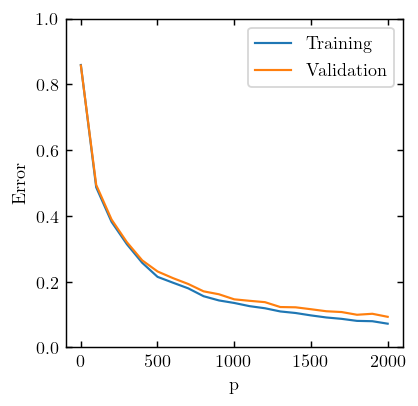

In [23]:
plt.plot(np.arange(1,2002,100), train_errs, label='Training')
plt.plot(np.arange(1,2002,100), val_errs, label='Validation')
plt.xlabel('p')
plt.ylabel('Error')
plt.legend()
plt.ylim(0,1)
plt.savefig('B2a.pdf')

In [24]:
a = np.array([[1,2],[3,4]])
b = np.array([1,2])
a + b

array([[2, 4],
       [4, 6]])

In [184]:
classifier.predict(X_train)

array([5, 0, 4, ..., 5, 6, 8])

In [189]:
diff_train = Y_train - classifier.predict(X_train)
e_train = len(diff_train[diff_train != 0]) / len(diff_train)
print(f'Train error = {e_train:.4f}')

diff_test = Y_test - classifier.predict(X_test)
e_test = len(diff_test[diff_test != 0]) / len(diff_test)
print(f'Test error = {e_test:.4f}')

Train error = 0.1423
Test error = 0.1397


In [9]:
np.random.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if `